In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
!{sys.executable} -m pip install scikit-learn

In [24]:
 #import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (17, 10)
mpl.rcParams['axes.grid'] = True

In [4]:
asteroid_data = pd.read_csv('https://dagshub.com/mirsakhawathossain/Asteroid_ML/raw/cceba246d6e1755c40511f7ccbabd1ac819f0515/Data/sbdb_query_results.csv',low_memory=False).sort_index(axis=0)

In [5]:
asteroid_data.head(5)

,full_name,neo,pha,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.0,MBA
1,2 Pallas (A802 FA),N,N,4.12,513.000,0.1550,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.0,MBA
2,3 Juno (A804 RA),N,N,5.16,246.596,0.2140,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.0,MBA
3,4 Vesta (A807 FA),N,N,3.22,525.400,0.4228,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.0,MBA
4,5 Astraea (A845 XA),N,N,7.00,106.699,0.2740,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.0,MBA


In [6]:
asteroid_data.isnull().sum()

full_name          0
neo                4
pha            11255
H               1230
diameter     1172332
albedo       1173460
rot_per      1277860
e                  0
a                  0
q                  0
i                  0
om                 0
w                  0
ma                 1
ad                 4
n                  0
per                4
moid_ld        11254
class              0
dtype: int64

In [7]:
asteroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311963 entries, 0 to 1311962
Data columns (total 19 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   full_name  1311963 non-null  object 
 1   neo        1311959 non-null  object 
 2   pha        1300708 non-null  object 
 3   H          1310733 non-null  float64
 4   diameter   139631 non-null   float64
 5   albedo     138503 non-null   float64
 6   rot_per    34103 non-null    float64
 7   e          1311963 non-null  float64
 8   a          1311963 non-null  float64
 9   q          1311963 non-null  float64
 10  i          1311963 non-null  float64
 11  om         1311963 non-null  float64
 12  w          1311963 non-null  float64
 13  ma         1311962 non-null  float64
 14  ad         1311959 non-null  float64
 15  n          1311963 non-null  float64
 16  per        1311959 non-null  float64
 17  moid_ld    1300709 non-null  float64
 18  class      1311963 non-null  object 
dtype

In [8]:
dataframe=asteroid_data.drop(columns=['neo','full_name'])

In [9]:
dataframe['diameter'].fillna(dataframe.groupby('class')['diameter'].transform('median'),inplace=True)
dataframe['H'].fillna(dataframe.groupby('class')['H'].transform('median'),inplace=True)
dataframe['albedo'].fillna(dataframe.groupby('class')['albedo'].transform('median'),inplace=True)
dataframe['ma'].fillna(dataframe.groupby('class')['ma'].transform('median'),inplace=True)
dataframe['ad'].fillna(dataframe.groupby('class')['ad'].transform('median'),inplace=True)
dataframe['per'].fillna(dataframe.groupby('class')['per'].transform('median'),inplace=True)
dataframe['moid_ld'].fillna(dataframe.groupby('class')['moid_ld'].transform('median'),inplace=True)
dataframe['rot_per'].fillna(dataframe.groupby('class')['rot_per'].transform('median'),inplace=True)

In [10]:
dataframe[['diameter','albedo','ad','per']]=dataframe[['diameter','albedo','ad','per']].fillna(value=dataframe[['diameter','albedo','ad','per']].median())

In [11]:
dataframe.isnull().sum()

pha         11255
H               0
diameter        0
albedo          0
rot_per         0
e               0
a               0
q               0
i               0
om              0
w               0
ma              0
ad              0
n               0
per             0
moid_ld         0
class           0
dtype: int64

In [12]:
dataframe = dataframe.drop(columns=['class','pha'])

In [13]:
dataframe.isnull().sum()

H           0
diameter    0
albedo      0
rot_per     0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid_ld     0
dtype: int64

In [14]:
X = dataframe

In [15]:
import requests
response = requests.get('https://dagshub.com/mirsakhawathossain/Asteroid_ML/raw/a838c5aaa42a52947c920739b7a4970288e0a9a3/Data/pha_map.npy')

In [16]:
from io import BytesIO

data = BytesIO(response.content)

In [17]:
y = np.load(data)

In [18]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler().fit(X)
X_new = scaler.transform(X)
min_max = preprocessing.MinMaxScaler().fit(X_new)
X_minmax = min_max.transform(X_new)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:
X_data = pd.DataFrame(X_minmax,columns=X.columns)

In [20]:
y_data = pd.DataFrame(y,columns=['pha']).astype('int32')

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming you have your data loaded and X_data, y defined
# X_data is your features, and y is your target variable

# Convert y to a 1D array
y = y_data.values.ravel()

# Feature selection using chi-squared test
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X_data, y)

# Get scores and columns
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_data.columns)

# Concatenate scores and columns into a single DataFrame
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Display the selected features and their scores
print(feature_scores.nlargest(10, 'Score'))

     Feature        Score
4          e  1805.058034
12         n   252.470980
2     albedo    49.287066
14   moid_ld    40.679396
7          i    36.993302
6          q    33.734227
0          H    28.953978
1   diameter     7.761626
8         om     0.644109
10        ma     0.075554


[0.20537129 0.03144476 0.02647088 0.03739344 0.08915975 0.03930585
 0.07490085 0.05231084 0.03778883 0.04407991 0.04871795 0.04079131
 0.05255598 0.02735279 0.19235556]


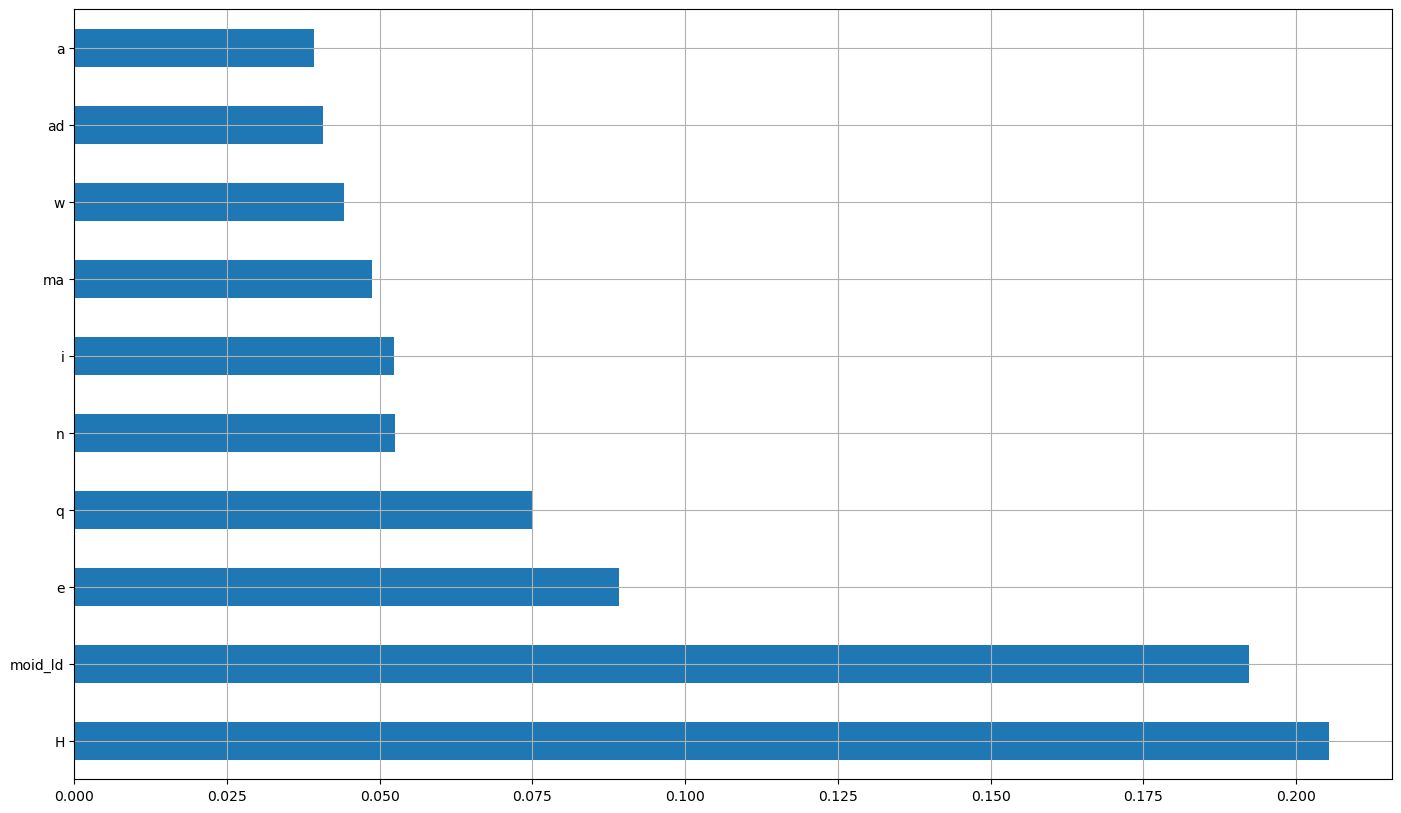

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_data,y_data)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()